In [1]:
#This sets the directory from which we will pull our dataset
    #1)	Have you heard of any recent implementations of machine learning? List one you’ve read about recently below. 

In [2]:
#Dataset available at: https://github.com/Nichols-C/Nichols-C

In [3]:
#Create a folder on your C drive named python and place the file in it. 

In [4]:
cd C:\python

C:\python


In [5]:
#Imports pandas and numpy for use later on
import pandas as pd
import numpy as np

#Imports our dataset from the CSV file Wind.CSV as "wind"
wind = pd.read_csv("Wind.csv")

In [6]:
import datetime #for use below

#Combines the values of year, month, day, hour, and minute to produce a single representative variable named "date"
wind['date'] = pd.to_datetime(wind[["Year", "Month", "Day", "Hour", "Minute"]])
wind.head()

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,...,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Wind Direction,Relative Humidity,Temperature,Pressure,WindForce,date
0,1998,1,1,0,0,0,0,0,0,0,...,161.94,0,0.16,4.7,207.2,92.94,-1.0,910,Gentle Breeze,1998-01-01 00:00:00
1,1998,1,1,0,30,0,0,0,0,0,...,164.56,0,0.16,4.6,207.2,92.92,-1.0,910,Gentle Breeze,1998-01-01 00:30:00
2,1998,1,1,1,0,0,0,0,0,0,...,164.74,0,0.16,4.5,212.2,92.43,-1.0,910,Gentle Breeze,1998-01-01 01:00:00
3,1998,1,1,1,30,0,0,0,0,0,...,162.40,0,0.16,4.4,212.2,92.41,-1.0,910,Gentle Breeze,1998-01-01 01:30:00
4,1998,1,1,2,0,0,0,0,0,0,...,158.35,0,0.16,4.3,218.9,91.88,-1.0,910,Gentle Breeze,1998-01-01 02:00:00


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt #for later use

from sklearn.model_selection import train_test_split

#Splits the data into a train and test set
train_set, test_set = train_test_split(wind, test_size=0.1, random_state=42)

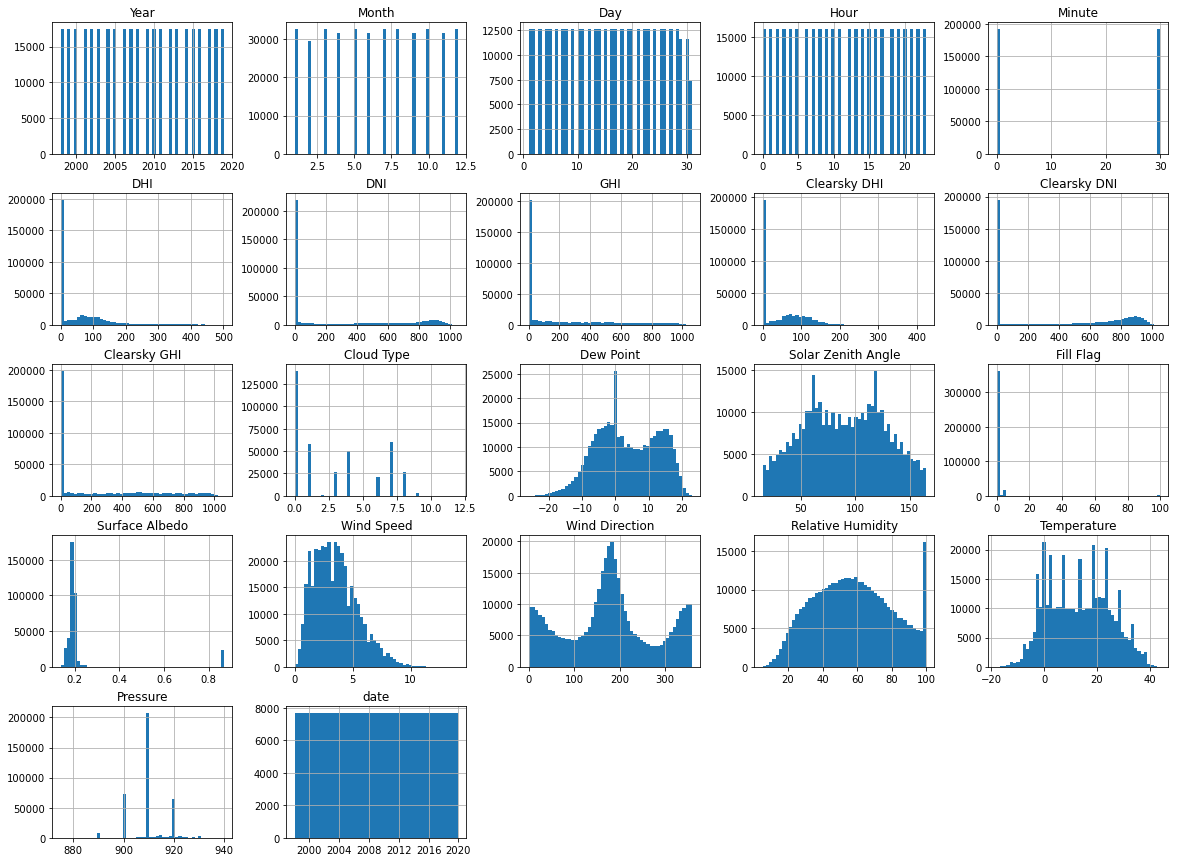

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

#Creates a histogram containing 50 bins for each variable contained in wind
wind.hist(bins = 50, figsize = (20, 15))
plt.show()

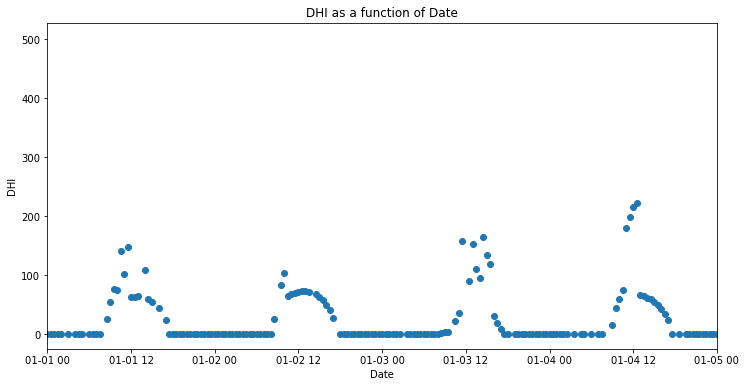

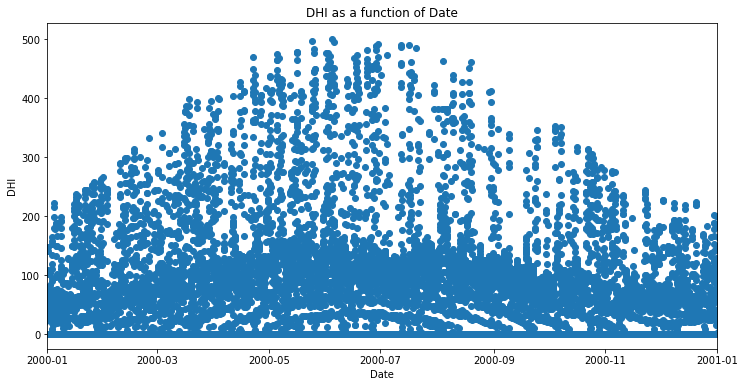

In [9]:
#Creates a 12x6 plot of DHI as a function of the date
plt.figure(figsize=(12, 6))
plt.plot(train_set['date'], train_set['DHI'], 'o')           # scatter plot showing actual data

plt.xlabel('Date')
plt.ylabel('DHI')
plt.title('DHI as a function of Date')

#limits the x axis to the first five days of January of 2000
plt.xlim([datetime.date(2000,1,1), datetime.date(2000,1,5)])

plt.show()

#Creates a second 12x6 plot of DHI as a function of the date
plt.figure(figsize=(12, 6))
plt.plot(train_set['date'], train_set['DHI'], 'o')           # scatter plot showing actual data

plt.xlabel('Date')
plt.ylabel('DHI')
plt.title('DHI as a function of Date')

#Limits the x axis to 2000 - 2001
plt.xlim([datetime.date(2000,1,1), datetime.date(2001,1,1)])

plt.show()

In [10]:
corr_matrix = wind.corr()

In [11]:
#Creates a correlation matrix showing the correlation of each variable with windcat (our encoded version of windforce)
corr_matrix["DHI"].sort_values(ascending=False)

DHI                   1.000000
Clearsky DHI          0.846172
Clearsky GHI          0.818248
Clearsky DNI          0.746752
GHI                   0.686849
DNI                   0.422846
Temperature           0.393220
Wind Speed            0.223557
Dew Point             0.157758
Hour                  0.096365
Cloud Type            0.089605
Minute                0.000290
Day                  -0.006226
Year                 -0.006876
Fill Flag            -0.013247
Wind Direction       -0.035413
Surface Albedo       -0.048971
Month                -0.056282
Pressure             -0.058129
Relative Humidity    -0.413230
Solar Zenith Angle   -0.752104
Name: DHI, dtype: float64

In [12]:
    #2) What correlations did you observe that make sense? _______________________________

    #3) Explain one of them below.


In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")

#Defines the numerical variables we intend to consider for training 
wind_num = wind.drop(["WindForce", "Wind Speed", "date", "DHI", "Minute", "Clearsky DHI", "Clearsky DNI", "Clearsky GHI"
                          ,"GHI", "DNI",
                      #"Hour", "Cloud Type", "Fill Flag", "Month"
                         ], axis = 1)

#Fills in any blank values according to the imputer strategy defined above
imputer.fit(wind_num)

SimpleImputer()

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Defines the imputer strategy and scaler method used to transform our numerical variables
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="mean")),('std_scaler',StandardScaler())
#        ('attribs_adder', CombinedAttributesAdder()),
    ])

In [15]:
from sklearn.preprocessing import OrdinalEncoder

from sklearn.compose import ColumnTransformer

#Defines numerical and categorical attributes 
num_attribs = list(wind_num)
cat_attribs = []

#Defines our full pipeline as the combination of the above numerical and categorical pipelines
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OrdinalEncoder(), cat_attribs),
    ])

#Calls pipeline to transform our train and test datasets according to the above specifications
wind_prepared = full_pipeline.fit_transform(train_set)
test_wind_prepared = full_pipeline.fit_transform(test_set)

In [16]:
#Imports linear regresssion model for training
from sklearn.linear_model import LinearRegression

#Defines linear_reg as a linear regressor which can be called to fit a variable
linear_reg = LinearRegression()

#Calls linear_reg to fit DHI using the train set defined above
linear_reg.fit(wind_prepared, train_set["DHI"])

LinearRegression()

In [17]:
from sklearn.metrics import mean_squared_error

#Train set predictions RMSE
wind_predictions = linear_reg.predict(wind_prepared)
test_wind_predictions = linear_reg.predict(test_wind_prepared)
forest_mse = mean_squared_error(train_set["DHI"], wind_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

55.33290591983851

In [18]:
#Test set predictions RMSE
forest_mse = mean_squared_error(test_set["DHI"], test_wind_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

55.11044773876337

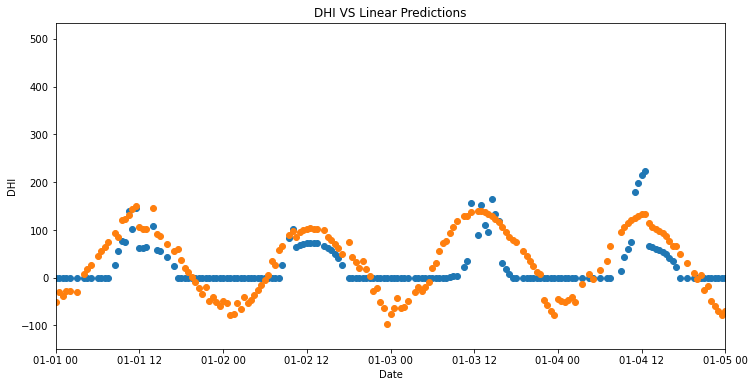

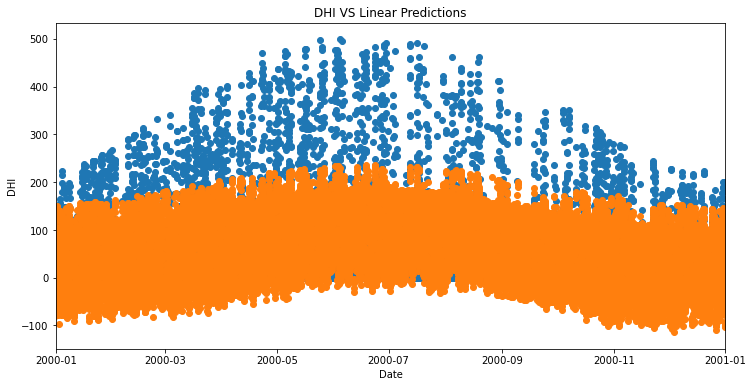

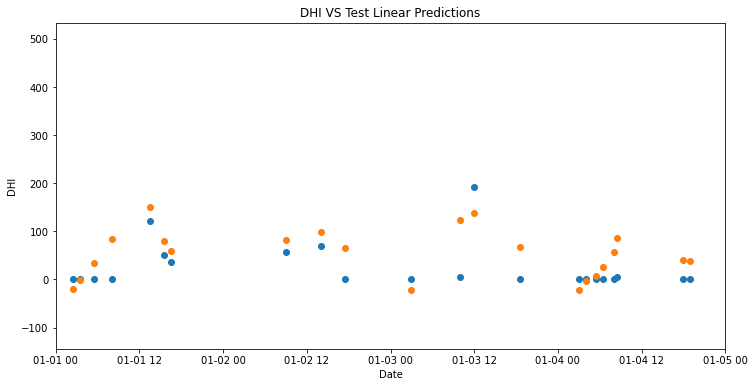

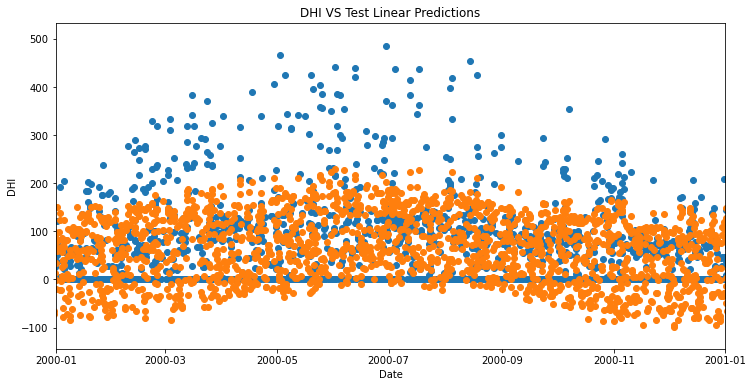

In [19]:
#Creates a 12x6 plot of DHI as a function of the date for the train predictions
plt.figure(figsize=(12, 6))
plt.plot(train_set['date'], train_set['DHI'], 'o')           # scatter plot showing actual data
plt.plot(train_set['date'], wind_predictions, 'o')   # regression line
plt.xlabel('Date')
plt.ylabel('DHI')
plt.title('DHI VS Linear Predictions')

#limits the x axis to the first five days of January of 2000
plt.xlim([datetime.date(2000,1,1), datetime.date(2000,1,5)])

plt.show()

#Creates a second 12x6 plot of DHI as a function of the date for the train predictions
plt.figure(figsize=(12, 6))
plt.plot(train_set['date'], train_set['DHI'], 'o')           # scatter plot showing actual data
plt.plot(train_set['date'], wind_predictions, 'o')   # regression line
plt.xlabel('Date')
plt.ylabel('DHI')
plt.title('DHI VS Linear Predictions')

#Limits the x axis to 2000 - 2001
plt.xlim([datetime.date(2000,1,1), datetime.date(2001,1,1)])

plt.show()

#Creates a 12x6 plot of DHI as a function of the date for the test predictions
plt.figure(figsize=(12, 6))
plt.plot(test_set['date'], test_set['DHI'], 'o')           # scatter plot showing actual data
plt.plot(test_set['date'], test_wind_predictions, 'o')   # regression line
plt.xlabel('Date')
plt.ylabel('DHI')
plt.title('DHI VS Test Linear Predictions')

#limits the x axis to the first five days of January of 2000
plt.xlim([datetime.date(2000,1,1), datetime.date(2000,1,5)])

plt.show()

#Creates a 12x6 plot of DHI as a function of the date for the test predictions
plt.figure(figsize=(12, 6))
plt.plot(test_set['date'], test_set['DHI'], 'o')           # scatter plot showing actual data
plt.plot(test_set['date'], test_wind_predictions, 'o')   # regression line
plt.xlabel('Date')
plt.ylabel('DHI')
plt.title('DHI VS Test Linear Predictions')

#Limits the x axis to 2000 - 2001
plt.xlim([datetime.date(2000,1,1), datetime.date(2001,1,1)])

plt.show()

In [20]:
#Imports random forest model for training
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

#Defines forest_reg as a randomforest regressor with the listed parameters
forest_reg = RandomForestRegressor(
    n_estimators=200, 
    n_jobs = 8, 
    random_state=42, 
    max_depth= 406, 
    min_samples_leaf = 1, 
    min_samples_split = 2
)

#Calls forest_reg to fit the wind data making predictions on "DHI"
forest_reg.fit(wind_prepared, train_set["DHI"])

RandomForestRegressor(max_depth=406, n_estimators=200, n_jobs=8,
                      random_state=42)

In [21]:
#Train set predictions RMSE

wind_predictions = forest_reg.predict(wind_prepared)
test_wind_predictions = forest_reg.predict(test_wind_prepared)
forest_mse = mean_squared_error(train_set["DHI"], wind_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

8.908430868271427

In [22]:
#Test set predictions RMSE

forest_mse = mean_squared_error(test_set["DHI"], test_wind_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

24.247947209857692

In [23]:
    #4) How does the performance of this model compare to that of the regression model?  

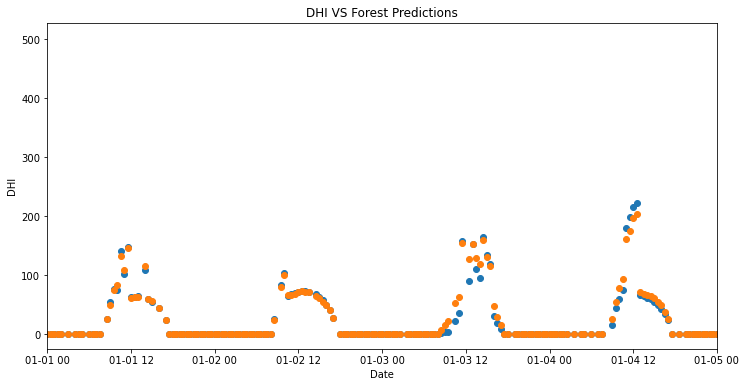

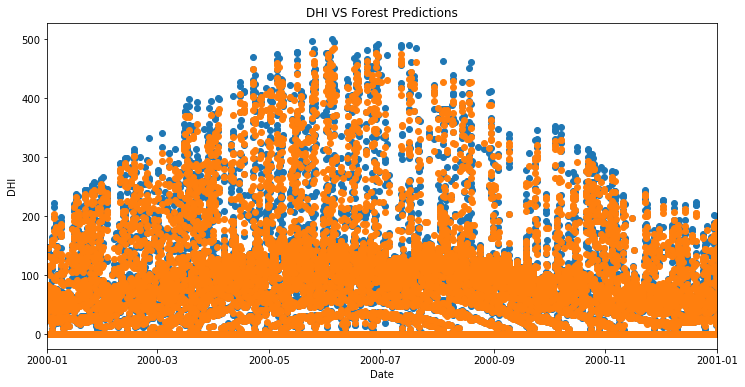

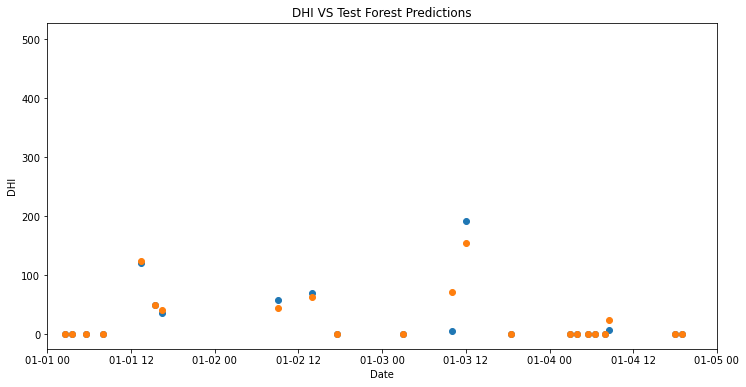

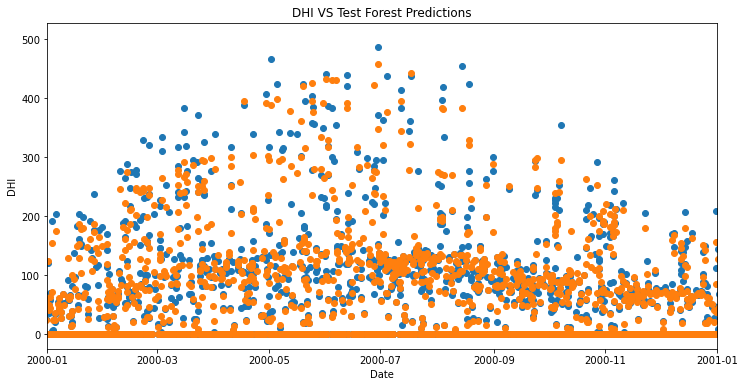

In [24]:
#Creates a 12x6 plot of DHI as a function of the date for the train predictions
plt.figure(figsize=(12, 6))
plt.plot(train_set['date'], train_set['DHI'], 'o')           # scatter plot showing actual data
plt.plot(train_set['date'], wind_predictions, 'o')   # regression line
plt.xlabel('Date')
plt.ylabel('DHI')
plt.title('DHI VS Forest Predictions')

#limits the x axis to the first five days of January of 2000
plt.xlim([datetime.date(2000,1,1), datetime.date(2000,1,5)])

plt.show()

#Creates a second 12x6 plot of DHI as a function of the date for the train predictions
plt.figure(figsize=(12, 6))
plt.plot(train_set['date'], train_set['DHI'], 'o')           # scatter plot showing actual data
plt.plot(train_set['date'], wind_predictions, 'o')   # regression line
plt.xlabel('Date')
plt.ylabel('DHI')
plt.title('DHI VS Forest Predictions')

#Limits the x axis to 2000 - 2001
plt.xlim([datetime.date(2000,1,1), datetime.date(2001,1,1)])

plt.show()

#Creates a 12x6 plot of DHI as a function of the date for the test predictions
plt.figure(figsize=(12, 6))
plt.plot(test_set['date'], test_set['DHI'], 'o')           # scatter plot showing actual data
plt.plot(test_set['date'], test_wind_predictions, 'o')   # regression line
plt.xlabel('Date')
plt.ylabel('DHI')
plt.title('DHI VS Test Forest Predictions')

#limits the x axis to the first five days of January of 2000
plt.xlim([datetime.date(2000,1,1), datetime.date(2000,1,5)])

plt.show()

#Creates a 12x6 plot of DHI as a function of the date for the test predictions
plt.figure(figsize=(12, 6))
plt.plot(test_set['date'], test_set['DHI'], 'o')           # scatter plot showing actual data
plt.plot(test_set['date'], test_wind_predictions, 'o')   # regression line
plt.xlabel('Date')
plt.ylabel('DHI')
plt.title('DHI VS Test Forest Predictions')

#Limits the x axis to 2000 - 2001
plt.xlim([datetime.date(2000,1,1), datetime.date(2001,1,1)])

plt.show()

In [25]:
from pprint import pprint

#Prints current hyperparameters

pprint(forest_reg.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 406,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': 8,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [26]:
#Prints feature importances
forest_reg.feature_importances_

array([0.00849883, 0.0043217 , 0.00823051, 0.00397742, 0.14713677,
       0.00812242, 0.75875518, 0.00793709, 0.00849953, 0.01276712,
       0.01916006, 0.00921104, 0.00338232])

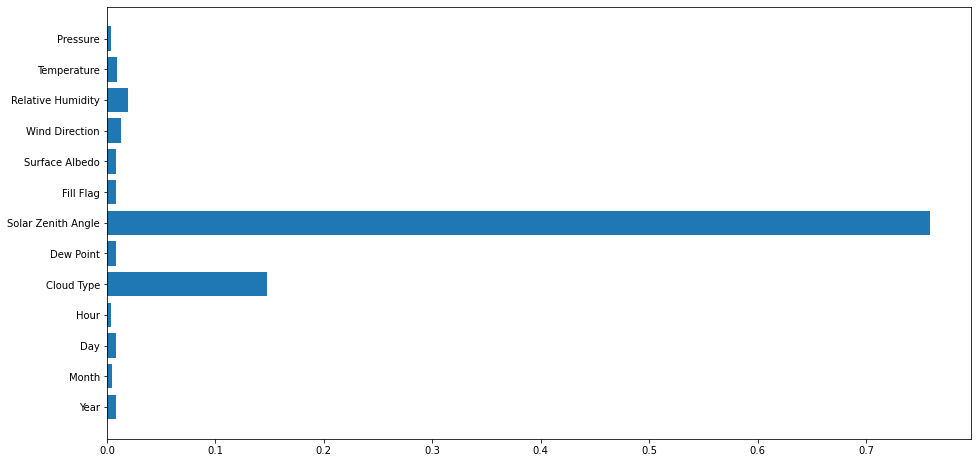

In [27]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0,0,1,1])

#Graphs feature importances on a 12x6 horizontal bar graph
ax.barh(num_attribs, forest_reg.feature_importances_)
plt.show()

In [28]:
    #5) From the above graph we can see that the solar zenith angle and cloud type played the biggest role 
    #in making predictions. Can you explain what those two variables have in common with solar energy?

In [29]:
#Creates a validation subset from the train set for use with a neural network
train_set, validation_set = train_test_split(train_set, test_size = 0.1, random_state = 42)

#Defines new test, train, and validation sets to call the pipeline to transform for the neural network (NN)
train_wind_prepared = full_pipeline.fit_transform(train_set)
test_wind_prepared = full_pipeline.fit_transform(test_set)
validation_wind_prepared = full_pipeline.fit_transform(validation_set)

In [30]:
#Imports Tensorflow and Keras for training a neural network
import tensorflow as tf

from tensorflow import keras
from sklearn.metrics import mean_squared_error

#Defines NN as the neural network with the listed parameters
NN = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
])

#Compiles and runs the above neural network with the defined hyperparameters (!This may take a while to run)
NN.compile(loss = "mean_squared_error", optimizer = keras.optimizers.SGD(lr=0.000001))
history = NN.fit(train_wind_prepared, train_set["DHI"], epochs = 200, 
                 batch_size = 256,
                   validation_data = (validation_wind_prepared, validation_set["DHI"]))

Epoch 1/200
1220/1220 [==============================] - 4s 3ms/step - loss: 11468.0029 - val_loss: 11501.0703
Epoch 2/200
1220/1220 [==============================] - 4s 3ms/step - loss: 11260.8594 - val_loss: 11048.9346
Epoch 3/200
1220/1220 [==============================] - 4s 3ms/step - loss: 8037.5928 - val_loss: 4082.8975
Epoch 4/200
1220/1220 [==============================] - 4s 3ms/step - loss: 2640.6660 - val_loss: 1914.9844
Epoch 5/200
1220/1220 [==============================] - 4s 3ms/step - loss: 1707.6235 - val_loss: 1607.1707
Epoch 6/200
1220/1220 [==============================] - 4s 3ms/step - loss: 1504.7435 - val_loss: 1459.5447
Epoch 7/200
1220/1220 [==============================] - 4s 3ms/step - loss: 1364.9073 - val_loss: 1328.0427
Epoch 8/200
1220/1220 [==============================] - 4s 3ms/step - loss: 1244.3466 - val_loss: 1221.3215
Epoch 9/200
1220/1220 [==============================] - 4s 3ms/step - loss: 1152.5449 - val_loss: 1141.8932
Epoch 10/200
12

1220/1220 [==============================] - 4s 3ms/step - loss: 733.1870 - val_loss: 758.9876
Epoch 77/200
1220/1220 [==============================] - 4s 3ms/step - loss: 732.6165 - val_loss: 756.9448
Epoch 78/200
1220/1220 [==============================] - 4s 3ms/step - loss: 732.0195 - val_loss: 755.6578
Epoch 79/200
1220/1220 [==============================] - 4s 3ms/step - loss: 731.2249 - val_loss: 755.1333
Epoch 80/200
1220/1220 [==============================] - 4s 3ms/step - loss: 730.6247 - val_loss: 755.7719
Epoch 81/200
1220/1220 [==============================] - 4s 3ms/step - loss: 730.3104 - val_loss: 755.0704
Epoch 82/200
1220/1220 [==============================] - 3s 3ms/step - loss: 729.5963 - val_loss: 753.8132
Epoch 83/200
1220/1220 [==============================] - 4s 3ms/step - loss: 729.2207 - val_loss: 753.8357
Epoch 84/200
1220/1220 [==============================] - 4s 3ms/step - loss: 728.3112 - val_loss: 751.0381
Epoch 85/200
1220/1220 [=================

1220/1220 [==============================] - 4s 3ms/step - loss: 703.3292 - val_loss: 728.4141
Epoch 152/200
1220/1220 [==============================] - 3s 3ms/step - loss: 703.0408 - val_loss: 737.6948
Epoch 153/200
1220/1220 [==============================] - 4s 3ms/step - loss: 703.0103 - val_loss: 728.4749
Epoch 154/200
1220/1220 [==============================] - 4s 3ms/step - loss: 702.5901 - val_loss: 727.7390
Epoch 155/200
1220/1220 [==============================] - 4s 3ms/step - loss: 701.9631 - val_loss: 731.2728
Epoch 156/200
1220/1220 [==============================] - 4s 3ms/step - loss: 701.9537 - val_loss: 727.6400
Epoch 157/200
1220/1220 [==============================] - 4s 3ms/step - loss: 701.7932 - val_loss: 727.0484
Epoch 158/200
1220/1220 [==============================] - 4s 3ms/step - loss: 701.4149 - val_loss: 727.2480
Epoch 159/200
1220/1220 [==============================] - 4s 3ms/step - loss: 700.9071 - val_loss: 725.3846
Epoch 160/200
1220/1220 [========

In [31]:
    #6) Based on the data provided, which model would you choose to work with? Why? 

In [32]:
#Train set predictions RMSE
train_wind_predictions = NN.predict(train_wind_prepared)
test_wind_predictions = NN.predict(test_wind_prepared)
forest_mse = mean_squared_error(train_set["DHI"], train_wind_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

26.223219747918595

In [33]:
#Test set predictions RMSE
forest_mse = mean_squared_error(test_set["DHI"], test_wind_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

26.383902525200632

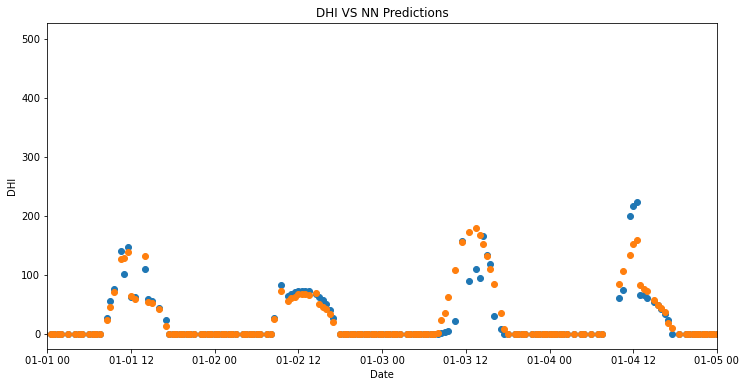

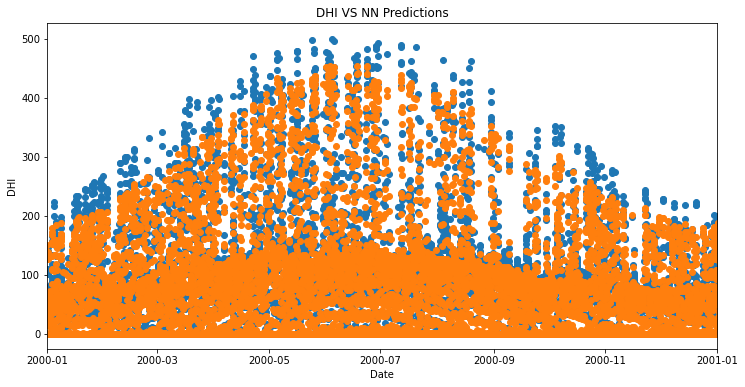

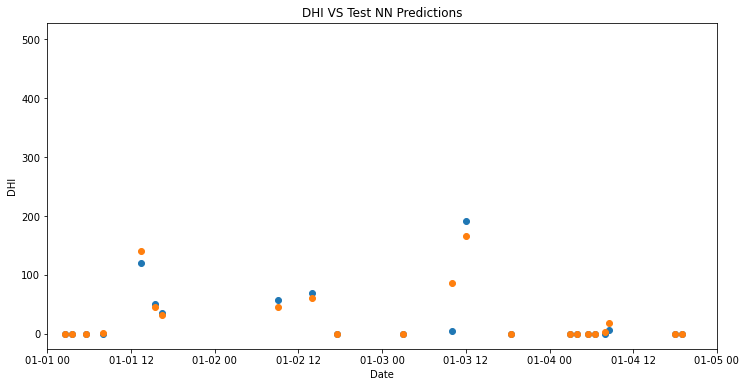

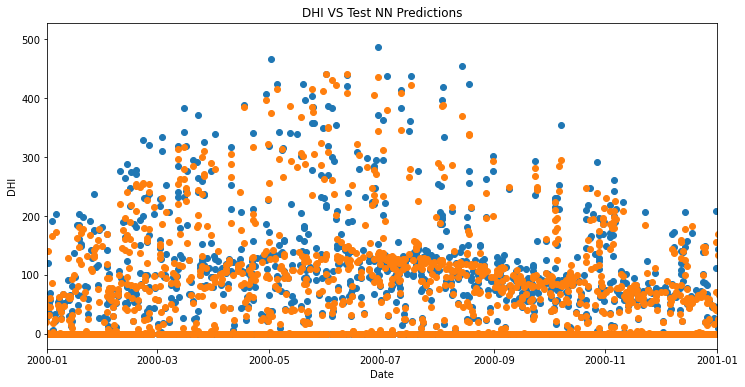

In [34]:
#Creates a 12x6 plot of DHI as a function of the date for the train predictions
plt.figure(figsize=(12, 6))
plt.plot(train_set['date'], train_set['DHI'], 'o')           # scatter plot showing actual data
plt.plot(train_set['date'], train_wind_predictions, 'o')   # regression line
plt.xlabel('Date')
plt.ylabel('DHI')
plt.title('DHI VS NN Predictions')

#limits the x axis to the first five days of January of 2000
plt.xlim([datetime.date(2000,1,1), datetime.date(2000,1,5)])

plt.show()

#Creates a second 12x6 plot of DHI as a function of the date for the train predictions
plt.figure(figsize=(12, 6))
plt.plot(train_set['date'], train_set['DHI'], 'o')           # scatter plot showing actual data
plt.plot(train_set['date'], train_wind_predictions, 'o')   # regression line
plt.xlabel('Date')
plt.ylabel('DHI')
plt.title('DHI VS NN Predictions')

#Limits the x axis to 2000 - 2001
plt.xlim([datetime.date(2000,1,1), datetime.date(2001,1,1)])

plt.show()

#Creates a 12x6 plot of DHI as a function of the date for the test predictions
plt.figure(figsize=(12, 6))
plt.plot(test_set['date'], test_set['DHI'], 'o')           # scatter plot showing actual data
plt.plot(test_set['date'], test_wind_predictions, 'o')   # regression line
plt.xlabel('Date')
plt.ylabel('DHI')
plt.title('DHI VS Test NN Predictions')

#limits the x axis to the first five days of January of 2000
plt.xlim([datetime.date(2000,1,1), datetime.date(2000,1,5)])

plt.show()

#Creates a 12x6 plot of DHI as a function of the date for the test predictions
plt.figure(figsize=(12, 6))
plt.plot(test_set['date'], test_set['DHI'], 'o')           # scatter plot showing actual data
plt.plot(test_set['date'], test_wind_predictions, 'o')   # regression line
plt.xlabel('Date')
plt.ylabel('DHI')
plt.title('DHI VS Test NN Predictions')

#Limits the x axis to 2000 - 2001
plt.xlim([datetime.date(2000,1,1), datetime.date(2001,1,1)])

plt.show()